In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
# from astropy import units as u
# from astropy.coordinates import ICRS, Distance, SkyCoord

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
clist = ['#c21f30', '#ffffff', '#1677b3']
new_cmap = LinearSegmentedColormap.from_list('wb', clist)

# sns.set(style="white", palette="muted", color_codes=True)
# sns.set_context("talk")
# from matplotlib import rcParams
# rcParams['mathtext.fontset'] = 'cm'
# rcParams['font.family'] = 'Garamond'
# rcParams['font.weight'] = 'ultralight'
# rcParams['pdf.fonttype'] = 42

plt.style.use('default')
sns.set_color_codes()

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.cal'] = 'Arial'
rcParams['mathtext.it'] = 'Arial'
rcParams['mathtext.rm'] = 'Arial'

## 新的

FRB 180916 -  0.11942309512265666 - Error - 0.005780761497559154
FRB 201124 -  2.5120658047865807 - Error - 0.0957159047225514
FRB 190303 -  3.5941284219976173 - Error - 0.03840050595649397
FRB 190417 -  6.131683278601672 - Error - 0.4646909474182386
FRB 180301 -  6.347439759152348 - Error - 0.36245081974270016
FRB 121102 -  30.935409099643714 - Error - 0.41316204576722815
FRB 190520 -  218.936048061564 - Error - 10.249659427076972


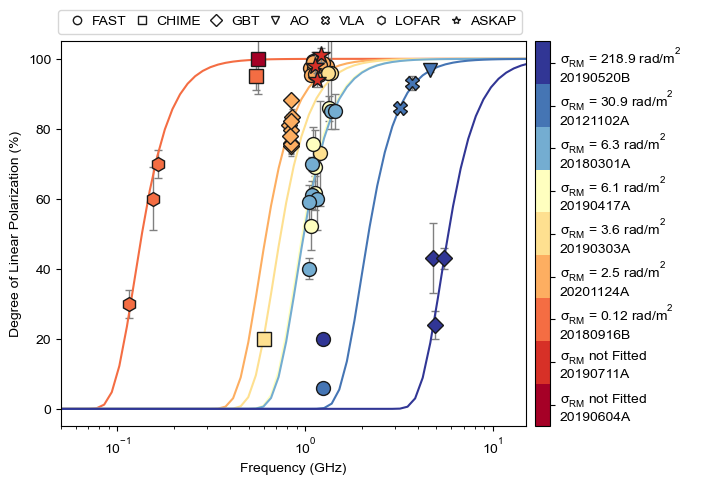

In [2]:
from astropy import constants as const
from matplotlib.gridspec import GridSpec

def rm_scatter_func(freq, b):
    wave = const.c.value/freq/1e9
    return np.exp(-2 * wave**4 * b**2)

color_list = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee090', '#ffffbf', '#e0f3f8', '#abd9e9', '#74add1', '#4575b4', '#313695']
color_list = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee090', '#ffffbf', '#74add1', '#4575b4', '#313695']
cmap_plt = ListedColormap(color_list)
# cmap_name, revs = 'Spectral', 1
# if revs:
#     color_list = sns.color_palette(cmap_name, 9)[::-1]
#     cmap_plt = plt.get_cmap(cmap_name, 9).reversed()
# else:
#     color_list = sns.color_palette(cmap_name, 9)
#     cmap_plt = plt.get_cmap(cmap_name, 9)

plt.figure(figsize=(6, 5))
line_x = np.logspace(-2, 2, 100)

# FRB 190604
plt.errorbar([0.56], [1.0], [0.1], 
             color=color_list[0], fmt='s', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20190604A CHIME')
# FRB 190711
plt.errorbar([1.22, 1.15, 1.13], [1.01, 0.94, 0.98], [0.02, 0.02, 0.04], 
             color=color_list[1],fmt='*', mec='k', ecolor='gray', capsize=3, ms=13, lw=1, label='20190711A ASKAP', zorder=10)

# FRB 180916
plt.errorbar([0.115, 0.155, 0.165], [0.3, 0.6, 0.7], [0.04, 0.09, 0.04], 
             color=color_list[2], fmt='h', mec='k', ecolor='gray',capsize=3, ms=10, lw=1, label='20180916B LOFAR')
plt.errorbar([0.55], [0.95], [0.04],
             color=color_list[2], fmt='s', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20180916B CHIME')
popt, pcov = curve_fit(rm_scatter_func, [0.115, 0.155, 0.165, 0.55], [0.3, 0.6, 0.7, 0.95], sigma=[0.04, 0.09, 0.04, 0.04])
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[2])
print('FRB 180916 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

# FRB 201124
fast_data = pd.read_csv('./CalData/201124-FAST.csv')
fast_data = fast_data.loc[(fast_data.linear_error<4)&(fast_data.circular.abs()<10)]
gbt_data = pd.read_csv('./CalData/201124-GBT.csv')
plt.errorbar(gbt_data.frequency/1e3, gbt_data.linear/100, gbt_data.linear_error/100, 
             color=color_list[3], fmt='D', mec='k', ecolor='gray', capsize=2, ms=8, lw=0.5, label='20201124A GBT')
plt.errorbar(fast_data.frequency/1e3, fast_data.linear/100, fast_data.linear_error/100, 
             color=color_list[3], fmt='o', mec='k', ecolor='gray', capsize=2, ms=10, lw=0.5, label='20201124A FAST')
popt, pcov = curve_fit(rm_scatter_func, np.append(gbt_data.frequency/1e3, fast_data.frequency/1e3), 
                       np.append(gbt_data.linear/100, fast_data.linear/100))
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[3])
print('FRB 201124 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

# FRB 190303
plt.errorbar([0.6], [0.2], [0],
             color=color_list[4],fmt='s', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20190303A CHIME')
plt.errorbar([1.37, 1.2, 1.32], [0.96, 0.73, 0.96], [0.16, 0.15, 0.11], 
             color=color_list[4],fmt='o', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20190303A FAST')
popt, pcov = curve_fit(rm_scatter_func, [1.37, 1.2, 1.32, 0.6], [0.96, 0.73, 0.96, 0.2], sigma=[0.16, 0.15, 0.11, 0.01])
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[4])
print('FRB 190303 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

# FRB 190417
fast_data_2 = pd.read_csv('./CalData/190417-FAST.csv')
fast_data_2 = fast_data_2.loc[(fast_data_2.filename!='burst2')&(fast_data_2.filename!='burst3')]
plt.errorbar(fast_data_2.frequency/1e3, fast_data_2.linear/100, fast_data_2.linear_error/100, 
                  color=color_list[5], fmt='o', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20190417A FAST')
popt, pcov = curve_fit(rm_scatter_func, fast_data_2.frequency/1e3, fast_data_2.linear/100, sigma=fast_data_2.linear_error/100)
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[5])
print('FRB 190417 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

# FRB 180301
x = 1 + np.array([194, 45, 24, 82, 48, 26, 226]) * 0.00195
y1, y_err = [0.85, 0.61, 0.40, 0.6, 0.7, 0.59, 0.85], [0.01, 0.04, 0.03, 0.09, 0.02, 0.05, 0.05]
plt.errorbar(x, y1, y_err, 
             color=color_list[6], fmt='o', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20180301A FAST')
popt, pcov = curve_fit(rm_scatter_func, x, y1, sigma=y_err)
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[6])
print('FRB 180301 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

# FRB 121102
plt.errorbar([3.2, 3.7], [0.86, 0.93], [0.01, 0.02],
             color=color_list[7], fmt='X', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20121102A VLA')
plt.errorbar([4.6], [0.967], [0.004],
             color=color_list[7], fmt='v', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20121102A AO')
plt.errorbar([1.25], [0.06], [0],
             color=color_list[7], fmt='o', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20121102A FAST')
popt, pcov = curve_fit(rm_scatter_func, [3.2, 3.7, 4.6], [0.86, 0.93, 0.967], sigma=[0.01, 0.02, 0.004])
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[7])
print('FRB 121102 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

# FRB 190520
plt.errorbar([4.82, 4.92, 5.51], [0.43, 0.24, 0.43], [0.1, 0.04, 0.03], 
             color=color_list[8], fmt='D', mec='k', ecolor='gray', capsize=3, ms=8, lw=1, label='20190520B GBT')
plt.errorbar([1.25], [0.2], [0], 
             color=color_list[8], fmt='o', mec='k', ecolor='gray', capsize=3, ms=10, lw=1, label='20190520B FAST')
popt, pcov = curve_fit(rm_scatter_func, [4.82, 4.92, 5.51],[0.43, 0.24, 0.43], sigma=[0.1, 0.04, 0.03])
plt.plot(line_x, rm_scatter_func(line_x, *popt), color=color_list[8])
print('FRB 190520 - ', popt[0], '- Error -', np.sqrt(pcov[0][0]))

mt1 = plt.errorbar([1e-2], [0], [0], marker='o', color='white', mec='k', label='FAST')
mt2 = plt.errorbar([1e-2], [0], [0], marker='s', color='white', mec='k', label='CHIME')
mt3 = plt.errorbar([1e-2], [0], [0], marker='D', color='white', mec='k', label='GBT')
mt4 = plt.errorbar([1e-2], [0], [0], marker='v', color='white', mec='k', label='AO')
mt5 = plt.errorbar([1e-2], [0], [0], marker='X', color='white', mec='k', label='VLA')
mt6 = plt.errorbar([1e-2], [0], [0], marker='h', color='white', mec='k', label='LOFAR')
mt7 = plt.errorbar([1e-2], [0], [0], marker='*', color='white', mec='k', label='ASKAP')

plt.xscale('log')
plt.xlim([0.05, 15])
plt.ylim([-0.05, 1.05])
# plt.xticks([0.2, 0.6, 1, 2, 4, 8, 10], ['0.2', '0.6', '1', '2', '4', '8', '10'])
plt.yticks(np.arange(0, 6)/5, np.linspace(0, 100, 6).astype(np.int64))
plt.xlabel('Frequency (GHz)')
plt.ylabel('Degree of Linear Polarization (%)')

sm = plt.cm.ScalarMappable(cmap=cmap_plt, norm=matplotlib.colors.Normalize(vmin=0, vmax=9))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(0, 9 ,1), cax=plt.axes([0.915, 0.11, 0.025, 0.77]))
cbar.set_ticks(np.arange(0, 9 ,1) + 0.5)
cbar.set_ticklabels(['$\sigma_{\mathrm{RM}}$ not Fitted                  \n20190604A', 
                     '$\sigma_{\mathrm{RM}}$ not Fitted                  \n20190711A', 
                     '$\sigma_{\mathrm{RM}}$ = 0.12 $\mathrm{rad/m}^2$   \n20180916B', 
                     '$\sigma_{\mathrm{RM}}$ = 2.5 $\mathrm{rad/m}^2$    \n20201124A', 
                     '$\sigma_{\mathrm{RM}}$ = 3.6 $\mathrm{rad/m}^2$    \n20190303A', 
                     '$\sigma_{\mathrm{RM}}$ = 6.1 $\mathrm{rad/m}^2$    \n20190417A', 
                     '$\sigma_{\mathrm{RM}}$ = 6.3 $\mathrm{rad/m}^2$    \n20180301A', 
                     '$\sigma_{\mathrm{RM}}$ = 30.9 $\mathrm{rad/m}^2$   \n20121102A', 
                     '$\sigma_{\mathrm{RM}}$ = 218.9 $\mathrm{rad/m}^2$  \n20190520B'])

plt.legend(handles=[mt1, mt2, mt3, mt4, mt5, mt6, mt7], loc=[-31.8, 1.02], ncol=7, columnspacing=0.1, handletextpad=0.05)
# plt.savefig('Figure/RM_Scatter_New.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

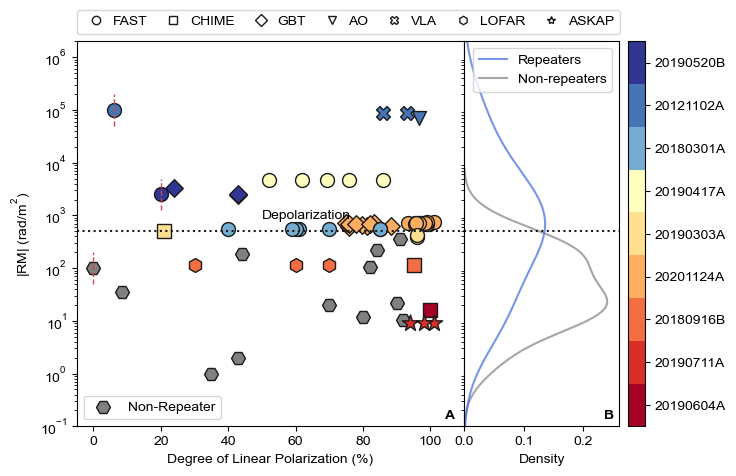

In [3]:
from matplotlib import gridspec

color_list = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee090', '#ffffbf', '#74add1', '#4575b4', '#313695']
cmap_plt = ListedColormap(color_list)

plt.figure(figsize=(7, 5))
plt.subplots_adjust(wspace=0, hspace=0)
gs = gridspec.GridSpec(1, 7)
ax = plt.subplot(gs[0, 0:5])

repeat = ['FRB180916', 'FRB190604', 'FRB121102', 'FRB190711']
rms1 = np.abs(np.array([-114.6, -16, 100000, 9]))
linear1, circular1 = [100, 100, 100, 100], [0, 0, 0, 0]
uncer = ['FRB190303', 'FRB171019', 'FRB180301', 'FRB190520']
rms2 = np.abs(np.array([-504.4, 30000, 546, np.nan]))
linear2, circular2 = [21, np.nan, np.nan, np.nan], [np.nan, 0, 0, 0]

########### 非重复暴 ###########
norepeat = ['FRB180924','FRB190102','FRB190608','FRB190611',\
            'FRB110523','FRB140514','FRB150215','FRB150418',\
            'FRB151230','FRB150807','FRB160102','FRB181112']
rms3 = np.abs(np.array([22, -105, 353, 20, -186.1, np.nan, 2, 0,12, -221, 10.5]))
linear3 = np.array([90.2, 82.2, 91, 70, 44, 0, 43, 35, 80, 84, 92])
circular3 = np.abs(np.array([-13.3, 4.8, -9, 57, 23, 21, 3, 0, 6, 6, 30, 34]))
ce3 = np.array([1.4, 0.5, 2, 3, 30, 7, 1, 4.5, 11, 1, 11, np.nan])
 
a1 = plt.scatter(linear3, rms3, label='Non-Repeater', marker='H', color='gray', edgecolors='k', s=100)
# FRB150418 nan,0
plt.scatter(8.5, 36, marker='H', color='gray', edgecolors='k', s=100)
# FRB151230 0->3
plt.scatter(35, 1, marker='H', color='gray', edgecolors='k', s=100)
#FRB140514 note we do not know the RM
plt.scatter(0, 1e2, marker='H', color='gray', edgecolors='k', s=100)
plt.plot([0, 0], [50, 200], c='r', linestyle='--', lw=1)

########### 重复暴 ###########
# FRB 190604
plt.scatter(100, 16,
            color=color_list[0], marker='s', edgecolors='k', s=100, label='20190604A CHIME')
# FRB 190711
plt.scatter([101, 94, 98], [9, 9, 9],
            color=color_list[1], marker='*', edgecolors='k', s=150, label='20190711A ASKAP')
# FRB 180916
plt.scatter([30, 60, 70], [114.6, 114.6, 114.6],
            color=color_list[2], marker='h', edgecolors='k', s=100, label='20180916B LOFAR')
plt.scatter([95], [114.6],
            color=color_list[2], marker='s', edgecolors='k', s=100, label='20180916B CHIME')
# FRB 201124
fast_data = pd.read_csv('./CalData/201124-FAST.csv')
fast_data = fast_data.loc[(fast_data.linear_error<4)&(fast_data.circular.abs()<20)]
gbt_data = pd.read_csv('./CalData/201124-GBT.csv')
gbt_data = gbt_data.loc[(gbt_data.snr>37)&(gbt_data.filename!='burst14')]
plt.scatter(gbt_data.linear, np.abs(gbt_data.rm), 
            color=color_list[3], marker='D', edgecolors='k', s=80, label='20201124A GBT')
plt.scatter(fast_data.linear, np.abs(fast_data.rm), 
            color=color_list[3], marker='o', edgecolors='k', s=100, label='20201124A FAST')
# FRB1 90303 0.1,0 # ignore a 73
plt.scatter(21, 504.4, 
            color=color_list[4], marker='s', edgecolors='k', s=100, label='20190303A CHIME')
plt.scatter([96, 96], [390, 421],
            color=color_list[4], marker='o', edgecolors='k', s=100, label='20190303A FAST')
# FRB 190417
fast_data_2 = pd.read_csv('./CalData/190417-FAST.csv')
fast_data_2 = fast_data_2.loc[(fast_data_2.filename!='burst2')&(fast_data_2.filename!='burst3')]
plt.scatter(fast_data_2.linear, np.abs(fast_data_2.rm), 
            color=color_list[5], marker='o', edgecolors='k', s=100, label='20190417A FAST')
# FRB180301 70,0
plt.scatter([85, 61, 40, 60, 70, 59, 85], [546, 546, 546, 546, 546, 546, 546],
            color=color_list[6], marker='o', edgecolors='k', s=100, label='20180301A FAST')
# FRB 121102
plt.scatter(96.7, 71525,
            color=color_list[7], marker='v', edgecolors='k', s=100, label='20121102A AO')
plt.scatter([86, 93], [86550, 86550],
            color=color_list[7], marker='X', edgecolors='k', s=100, label='20121102A VLA')
plt.scatter(6, 100000,
            color=color_list[7], marker='o', edgecolors='k', s=100, label='20121102A FAST')
plt.plot([6, 6], [0.5e5, 2e5], c='r', linestyle='--', lw=1)

# FRB 190520
plt.scatter([43, 24, 43],[2448, 3270, 2590], 
            color=color_list[8], marker='D', edgecolors='k', s=80, label='20190520B GBT')
plt.scatter([20], [2500], 
            color=color_list[8], marker='o', edgecolors='k', s=100, label='20190520B FAST')
plt.plot([20, 20], [1.25e3, 5e3], c='r', linestyle='--', lw=1)

mt1 = plt.errorbar([1e-2], [0], [0], marker='o', color='white', mec='k', label='FAST')
mt2 = plt.errorbar([1e-2], [0], [0], marker='s', color='white', mec='k', label='CHIME')
mt3 = plt.errorbar([1e-2], [0], [0], marker='D', color='white', mec='k', label='GBT')
mt4 = plt.errorbar([1e-2], [0], [0], marker='v', color='white', mec='k', label='AO')
mt5 = plt.errorbar([1e-2], [0], [0], marker='X', color='white', mec='k', label='VLA')
mt6 = plt.errorbar([1e-2], [0], [0], marker='h', color='white', mec='k', label='LOFAR')
mt7 = plt.errorbar([1e-2], [0], [0], marker='*', color='white', mec='k', label='ASKAP')

ax = plt.gca()
plt.text(0.95, 0.02, 'A', weight='bold', transform=ax.transAxes)
plt.axhline(500, c='k', linestyle='dotted')
plt.text(50, 1000, 'Depolarization', va='center')
plt.yscale('log')
plt.ylim(0.1, 2e6)
plt.xlim(-5, 110)

plt.xlabel('Degree of Linear Polarization (%)')
plt.ylabel('|RM| (rad/$\mathrm{m}^2$)')
legend1 = ax.legend(handles=[mt1, mt2, mt3, mt4, mt5, mt6, mt7], loc=[0, 1.02], ncol=7, columnspacing=0.87, handletextpad=0.2)
ax.add_artist(legend1)
ax.legend(handles=[a1], loc='lower left')

sm = plt.cm.ScalarMappable(cmap=cmap_plt, norm=matplotlib.colors.Normalize(vmin=0, vmax=9))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(0, 9 ,1), cax=plt.axes([0.912, 0.11, 0.025, 0.77]))
cbar.set_ticks(np.arange(0, 9 ,1) + 0.5)
cbar.set_ticklabels(['20190604A', '20190711A', '20180916B', 
                     '20201124A', '20190303A', '20190417A', 
                     '20180301A', '20121102A', '20190520B'])

ax = plt.subplot(gs[0, 5:])
repeaters = [-114, 16, -504, 71525, 546, 9, 4700, 3000, -689]
nonrepeat = [10.5, 22, -105, 353, 20, -186.1, 2, 36, -221, 12]
rep = pd.DataFrame({'RM': np.abs(repeaters), 'label': 'Repeaters'})
nor = pd.DataFrame({'RM': np.abs(nonrepeat), 'label': 'Non-repeaters'})
rm_df = pd.concat([rep, nor])
rm_df = rm_df.reset_index(drop=True)
g = sns.kdeplot(data=rm_df, y='RM', log_scale=True, fill=False, palette=['royalblue', 'gray'], 
            alpha=.7, linewidth=1.5, hue='label', ax=ax)
g.axes.get_legend().set_title('')
ax = plt.gca()
plt.text(0.9, 0.02, 'B', weight='bold', transform=ax.transAxes)
plt.hlines(500, 0, 0.3, color='k',linestyle='dotted')
plt.yticks([])
plt.ylabel('')
plt.ylim([0.1, 2e6])
plt.xlim(0, 0.26)

# plt.savefig('Figure/RM_Linear_New.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

## RM-Scatter vs Scatter

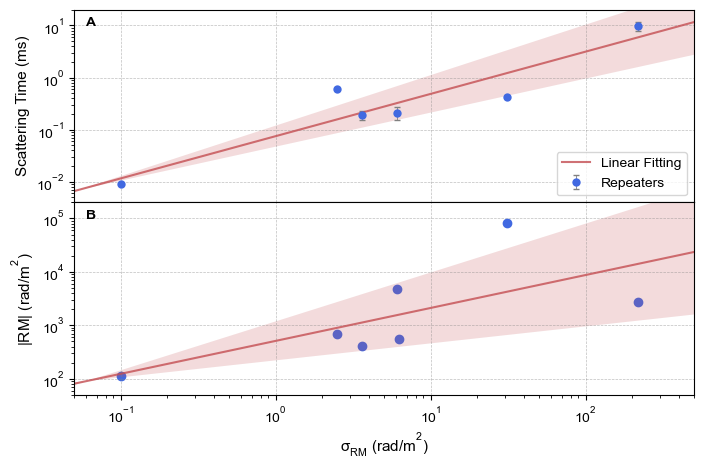

In [4]:
# name  [180916, 202011124, 190303, 190417, 121102,190520]

x = [0.1, 2.5, 3.6, 6.1, 30.9, 218.9]
xe = [0.005780761497559154, 0.0957159047225514, 0.03840050595649397, 0.4646909474182386, 0.41316204576722815, 10.249659427076972]
y = [0.009, 0.59, 0.19, 0.21, 0.43, 9.8]
ye = [0, 0, 0.04, 0.06, 0, 2]

def func_linear(x, a, b):
    return a * x + b

from matplotlib import gridspec

fig = plt.figure(figsize=(8, 5))
plt.subplots_adjust(wspace=0, hspace=0)
gs = gridspec.GridSpec(2, 1)

plt.subplot(gs[0, 0])
popt, pcov = curve_fit(func_linear, np.log10(x), np.log10(y))
plt.errorbar(x, y, yerr=ye, color='royalblue', fmt='o', mec='none', ecolor='gray', capsize=2, lw=0.6, label='Repeaters')
#plt.scatter(x, y, color='royalblue', label='Repeaters')
x = np.log10(np.logspace(-2, 3, 100))
# plt.plot(10**x, 10**func_linear(x, *popt), color='r', alpha=0.8, label='Slope = {:.2f}'.format(popt[0]))
plt.plot(10**x, 10**func_linear(x, *popt), color='r', alpha=0.8, label='Linear Fitting')
plt.fill_between(10**x, 10**func_linear(x, *(popt-np.sqrt(np.diag(pcov)))), 10**func_linear(x, *(popt+np.sqrt(np.diag(pcov)))), 
                color='r', alpha=0.2, lw=0)
plt.text(6e-2, 1e1, 'A', weight='bold')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Scattering Time (ms)', fontsize=11)
plt.ylim(4e-3, 2e1)
plt.xlim(5e-2, 5e2)
plt.legend(loc='lower right')
plt.grid(ls='--', color='gray', lw=0.5, alpha=0.5)
plt.subplot(gs[1, 0])

x = np.array([0.1, 2.5, 3.6, 6.1, 6.3, 30.9, 218.9])
y = np.array([115, 684, 406, 4682, 546, 81542, 2769])
plt.scatter(x, y, color='royalblue')

popt, pcov = curve_fit(func_linear, np.log10(x), np.log10(y))
x = np.log10(np.logspace(-2, 3, 100))
plt.plot(10**x, 10**func_linear(x, *popt), color='r', alpha=0.8, label='Linear Fitting')
plt.fill_between(10**x, 10**func_linear(x, *(popt-np.sqrt(np.diag(pcov)))), 10**func_linear(x, *(popt+np.sqrt(np.diag(pcov)))), 
                color='r', alpha=0.2, lw=0)
plt.text(6e-2, 1e5, 'B', weight='bold')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('|RM| (rad/m$^2$)', fontsize=11)
plt.xlabel('$\sigma_{RM}$ (rad/m$^2$)', fontsize=11)
plt.ylim(5e1, 2e5)
plt.xlim(5e-2, 5e2)
plt.grid(ls='--', color='gray', lw=0.5, alpha=0.5)
# plt.savefig('Figure/RMS-ST-RM.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
np.sqrt(pcov[0][0]), popt[0]

(0.2984671198238897, 0.61640416731158)